In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import norm
def normal(x):
    min_value = x.min()
    max_value = x.max()

    return (x - min_value) / (max_value - min_value)

#mean = df['column_to_normalize'].mean()
#std = df['column_to_normalize'].std()
#df['normalized_column'] = (df['column_to_normalize'] - mean) / std

In [29]:
# address

import_file = 'sub36-proactive-test_ADOEFFORT_2024-07-15_14h48.01.592.csv'
sub = import_file[3:5]
path = '/Volumes/x9/INITIAL_DATABASE/sub'+sub+'/'

if import_file[6:8] == "ro":
    strategy = 'rolling'
elif import_file[6:8] == "pr":
    strategy = 'proactive'
elif import_file[6:8] == "re":
    strategy = 'reactive'
elif import_file[6:8] == "st":
    strategy = 'static'

# Import an Excel file into a DataFrame
columns_to_import = ['n_block','n_back','m_correct','DifficultyLevel',
                     'false_alarm','hit','correct_rejection','miss',
                     'slider_effort.response','slider_arous.response','slider_valenc.response','slider_time.response','score']

df = pd.read_csv(path + import_file, usecols=columns_to_import)

df = df.dropna()

#computing dprim as perfomance

df.loc[df['false_alarm'] == 0, 'false_alarm'] = 0.01
df.loc[df['miss'] == 0, 'miss'] = 0.01
df.loc[df['miss'] == 0, 'miss'] = 0.01
df.loc[df['hit'] == 0, 'hit'] = 0.01

df['dprime'] = norm.ppf(df['hit']/(df['hit']+df['miss']))- norm.ppf(df['false_alarm']/(df['false_alarm']+df['correct_rejection']))
df['g'] = df['dprime']/6.8

#normlize the self-reports
df['effort'] = normal(df['slider_effort.response'])
df['arousal'] = normal(df['slider_arous.response'])
df['valence'] = normal(df['slider_valenc.response'])
df['time'] = normal(df['slider_time.response'])

# setting_up index
df.reset_index(drop=True, inplace=True)


# Categorize to 'low' and 'high'
median_effort = df['effort'].median()
df['effort_category'] = ['low effort' if x < median_effort else 'high effort' for x in df['effort']]

median_valence = df['valence'].median()
df['valence_category'] = ['low valence' if x < median_valence else 'high valence' for x in df['valence']]

median_arousal = df['arousal'].median()
df['arousal_category'] = ['low valence' if x < median_arousal else 'high arousal' for x in df['arousal']]

'''
# Categorize 'low effort' or 'high effort'
below_or_equal_median_indices = df[df['effort'] <= median_effort].index.tolist()
above_median_indices = df[df['effort'] > median_effort].index.tolist()

with open(path+sub+'-'+strategy+'-'+'low-effort.txt', 'w') as file:
    for index in below_or_equal_median_indices:
        file.write(f"{index}\n")

with open(path+sub+'-'+strategy+'-'+'high-effort.txt', 'w') as file:
    for index in above_median_indices:
        file.write(f"{index}\n")
        

# Categorize 'low valence' or 'high valence' 
below_or_equal_median_indices = df[df['valence'] <= median_valence].index.tolist()
above_median_indices = df[df['valence'] > median_valence].index.tolist()

with open(path+sub+'-'+strategy+'-'+'low-valence.txt', 'w') as file:
    for index in below_or_equal_median_indices:
        file.write(f"{index}\n")

with open(path+sub+'-'+strategy+'-'+'high-valence.txt', 'w') as file:
    for index in above_median_indices:
        file.write(f"{index}\n")


# Categorize 'low arousal' or 'high arousal' 
below_or_equal_median_indices = df[df['arousal'] <= median_arousal].index.tolist()
above_median_indices = df[df['arousal'] > median_arousal].index.tolist()

with open(path+sub+'-'+strategy+'-'+'low-arousal.txt', 'w') as file:
    for index in below_or_equal_median_indices:
        file.write(f"{index}\n")

with open(path+sub+'-'+strategy+'-'+'high-arousal.txt', 'w') as file:
    for index in above_median_indices:
        file.write(f"{index}\n")
'''
        
#adding RT
#computing response time of hit and false alaram
dfrt = pd.read_csv(path + import_file)
step_size = 62
means_list = []

# Iterate over the DataFrame in segments of 62 rows (excluding every 62nd row)
for start_idx in range(0, len(dfrt), step_size):
    end_idx = start_idx + step_size - 1  # Exclude the 62nd row, which is empty

    # Select the segment, excluding the last row (which is empty)
    df_segment = dfrt.iloc[start_idx:end_idx]

    # Calculate means where feedback is 12 and 13
    mean_response_12 = df_segment[df_segment['feedback'] == 12]['responseTime'].mean()
    mean_response_13 = df_segment[df_segment['feedback'] == 13]['responseTime'].mean()

    # Append the means to the list
    means_list.append({'mean_response_12': mean_response_12, 'mean_response_13': mean_response_13})

# Create a new DataFrame with the means
means_df = pd.DataFrame(means_list)

# Now means_df is the new DataFrame containing the means for each segment we put it back to df
df['rt_f'] = means_df['mean_response_12']
df['rt_h'] = means_df['mean_response_13']

#export
export_file = 'sub'+sub+'-'+strategy+'-'+'test'+'.csv'
df.to_csv(path + export_file, index=False)

df


,score,n_back,m_correct,DifficultyLevel,false_alarm,hit,correct_rejection,miss,n_block,slider_effort.response,...,slider_valenc.response,slider_time.response,dprime,g,effort,arousal,valence,time,rt_f,rt_h
0,19,1.0,4.0,4.0,0.01,19.0,39.0,2.00,0.0,79.166667,...,49.074074,76.018519,4.783209,0.703413,0.839773,0.823779,0.900855,0.652174,NaN,0.361564
1,9,2.0,4.0,7.0,2.00,11.0,38.0,9.00,1.0,70.833333,...,50.185185,56.388889,1.770515,0.260370,0.737500,0.414013,0.921368,0.364130,0.647606,0.487026
2,0,3.0,4.0,10.0,3.00,3.0,36.0,18.00,2.0,58.703704,...,3.333333,33.518519,0.358506,0.052722,0.588636,0.569002,0.056410,0.028533,0.495840,0.796010
3,7,3.0,4.0,10.0,0.01,7.0,39.0,14.00,3.0,83.055556,...,12.962963,50.555556,3.043310,0.447546,0.887500,0.856688,0.234188,0.278533,NaN,0.341403
4,15,2.0,8.0,11.0,0.01,15.0,40.0,5.00,4.0,69.629630,...,28.611111,65.092593,4.155313,0.611075,0.722727,0.582803,0.523077,0.491848,NaN,0.457307
5,19,1.0,8.0,8.0,1.00,20.0,39.0,0.01,5.0,50.462963,...,54.444444,99.074074,5.250631,0.772152,0.487500,0.291932,1.000000,0.990489,0.462326,0.427057
6,9,3.0,8.0,14.0,0.01,9.0,40.0,11.00,6.0,85.277778,...,29.166667,50.185185,3.355162,0.493406,0.914773,0.791932,0.533333,0.273098,NaN,0.340759
7,12,2.0,12.0,15.0,1.00,13.0,38.0,8.00,7.0,56.944444,...,35.833333,49.629630,2.252092,0.331190,0.567045,0.368365,0.656410,0.264946,0.563034,0.462937
8,7,3.0,12.0,18.0,1.00,7.0,39.0,13.00,8.0,79.444444,...,11.388889,60.833333,1.574644,0.231565,0.843182,1.000000,0.205128,0.429348,0.329018,0.329226
9,3,3.0,12.0,18.0,2.00,4.0,38.0,16.00,9.0,48.796296,...,3.148148,36.574074,0.803232,0.118122,0.467045,0.446921,0.052991,0.073370,0.949222,0.507695


/var/folders/2c/svzl68596196fc899jtjl4t00000gn/T/ipykernel_3565/3863055607.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


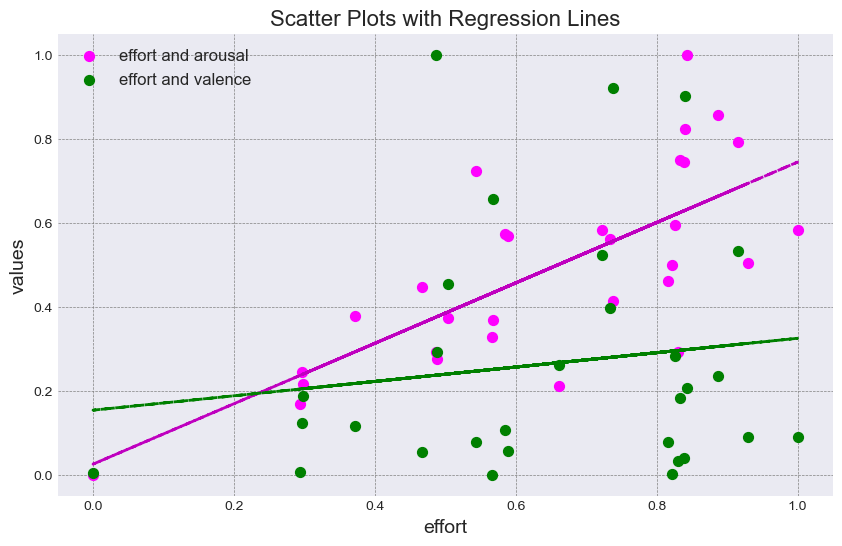

Regression Summary for effort and arousal : 
  Slope: 0.72
  Intercept: 0.02
  Correlation Coefficient (r): 0.73
  P-value: 0.00
  Standard error of the estimate: 0.13

Regression Summary for effort and valence : 
  Slope: 0.17
  Intercept: 0.15
  Correlation Coefficient (r): 0.14
  P-value: 0.46
  Standard error of the estimate: 0.23


In [30]:

#which variables ?
x = df['effort']
x.name = df['effort'].head().name

y = df['arousal']
y.name = df['arousal'].head().name

z = df['valence']
z.name = df['valence'].head().name


# Scatter Plot with regression lines
plt.figure(figsize=(10, 6))

# Regression line for Column1 and Column2
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)
plt.scatter(x, y, label= x.name+" and "+y.name, color='magenta', s=50)
plt.plot(x, p1(x), "m--", linewidth=2)

# Regression line for Column1 and Column3
z2 = np.polyfit(x, z, 1)
p2 = np.poly1d(z2)
plt.scatter(x, z, label= x.name+" and "+z.name, color='green', s=50)
plt.plot(x, p2(x), "g--", linewidth=2)

# Labels, Title, and Legend
plt.xlabel(x.name, fontsize=14)
plt.ylabel('values', fontsize=14)
plt.title('Scatter Plots with Regression Lines', fontsize=16)
plt.legend(fontsize=12)

# Grid and Style
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.style.use('seaborn-darkgrid')

# Show the plot
plt.show()

# Calculate and print the statistics for Column1 and Column2
result1 = linregress(x, y)
print("Regression Summary for " +x.name+" and "+y.name+" : ")
print(f"  Slope: {result1.slope:.2f}")
print(f"  Intercept: {result1.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result1.rvalue:.2f}")
print(f"  P-value: {result1.pvalue:.2f}")
print(f"  Standard error of the estimate: {result1.stderr:.2f}")

# Calculate and print the statistics for Column1 and Column3
result2 = linregress(x, z)
print("\nRegression Summary for " +x.name+" and "+z.name+" : ")
print(f"  Slope: {result2.slope:.2f}")
print(f"  Intercept: {result2.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result2.rvalue:.2f}")
print(f"  P-value: {result2.pvalue:.2f}")
print(f"  Standard error of the estimate: {result2.stderr:.2f}")

In [4]:

data = pd.read_csv('/Users/ali/Desktop/Experiment/check_list.csv')

for i in range(5,72):
    sub = data['sub'][i]
    strategy = data['strategy'][i]


    export_file = sub+'-'+strategy+'-'+'test'+'.csv'

    path = '/Volumes/x9/INITIAL_DATABASE/'+sub+'/'

    df = pd.read_csv(path + export_file)


    # Categorize to 'low' and 'high'
    median_effort = df['effort'].median()
    df['effort_category'] = ['low effort' if x < median_effort else 'high effort' for x in df['effort']]

    median_valence = df['valence'].median()
    df['valence_category'] = ['low valence' if x < median_valence else 'high valence' for x in df['valence']]

    median_arousal = df['arousal'].median()
    df['arousal_category'] = ['low arousal' if x < median_arousal else 'high arousal' for x in df['arousal']]
    
    median_arousal = df['score'].median()
    df['performance_category'] = ['low performance' if x < median_arousal else 'high performance' for x in df['score']]


    df.to_csv(path + export_file, index=False)


In [3]:
data = pd.read_csv('/Users/ali/Desktop/Experiment/check_list.csv')

data


,sub,strategy,test/train,sex,age,dominancM,dominancO,workingcapacity,besoincogni,response_cleaning,...,is static?,Comment,reactive,proactive,static,rolling,mean WC,mean BS,femme,homme
0,sub01,proactive,test,m,28.0,D,D,NaN,36.0,x,...,0,Pilot,15.0,15.0,14.0,14.0,31.0,32.527778,19.0,11.0
1,sub01,rolling,test,m,28.0,D,D,NaN,36.0,x,...,0,Pilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub02,proactive,test,f,29.0,D,D,NaN,44.0,x,...,0,Pilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub02,rolling,test,f,29.0,D,D,NaN,44.0,x,...,0,Pilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub03,proactive,test,m,26.0,D,G,38.0,39.0,x,...,0,Left Handed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,sub36,rolling,test,f,21.0,D,D,27.0,24.0,NaN,...,0,couldn't do the 3 back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df

,Unnamed: 0,score,n_back,m_correct,DifficultyLevel,false_alarm,hit,correct_rejection,miss,n_block,...,effort_category,valence_category,arousal_category,rt_f,rt_h,ps,dps,ps_baseline,ps_bs,performance_category
0,1,20,1,4,4,0.01,20,39,1.00,0,...,low effort,high valence,low arousal,NaN,0.482168,3957.103937,-0.296196,4050.645019,-0.023093,high performance
1,2,20,1,8,8,0.01,20,40,0.01,1,...,low effort,high valence,low arousal,NaN,0.470120,4209.455179,-0.414668,4358.025571,-0.034091,high performance
2,3,1,3,8,14,3.00,3,37,17.00,2,...,high effort,low valence,high arousal,0.674030,0.891580,4896.165793,-0.223137,4824.954363,0.014759,low performance
3,4,3,3,8,14,2.00,5,38,15.00,3,...,high effort,low valence,high arousal,0.729205,0.557451,4802.268657,-0.748227,4591.200165,0.045972,low performance
4,5,3,3,8,14,2.00,4,38,16.00,4,...,high effort,low valence,high arousal,0.604631,0.726840,NaN,NaN,4826.865844,NaN,low performance
5,6,10,2,12,15,2.00,12,37,9.00,5,...,low effort,low valence,low arousal,0.747530,0.626693,4827.500000,0.388889,4824.082135,0.000709,high performance
6,7,13,2,12,15,1.00,14,38,7.00,6,...,low effort,high valence,low arousal,0.732671,0.647187,4800.446970,-3.166667,4815.559466,-0.003138,high performance
7,8,0,3,12,18,8.00,1,32,19.00,7,...,high effort,low valence,high arousal,0.676246,0.462747,4854.396109,-0.023933,4675.619178,0.038236,low performance
8,9,3,3,12,18,3.00,5,37,15.00,8,...,high effort,low valence,high arousal,0.612478,0.452425,4588.163121,-6.708861,4454.387221,0.030032,low performance
9,10,12,2,4,7,2.00,14,37,7.00,9,...,low effort,high valence,low arousal,0.562935,0.678315,4959.360885,-2.398386,4485.498638,0.105643,high performance
